# Crime per population estimator

This notebook is trying to estimate the violent crime rate per population based on data from
https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
using different linear regression models on multivariate data.

It is based on examples from sklearn and is licensed under Apache 2.0 open source license.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.pipeline

%matplotlib inline

In [2]:
# Communities and Crime Dataset 
# https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
df_crime_dataset = pd.read_csv('communities.data.txt', na_values='?', header=None)
# this is just the headers from the community.names file
headers_df = pd.read_csv('data_headers.txt', sep=' ', header=None)
df_crime_dataset.columns = headers_df[1].tolist()
#df_crime_dataset

In [3]:
df_crime_dataset.shape

(1994, 128)

In [18]:
df_crime_dataset.describe()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,24.191575,18924.709629,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,...,0.065231,0.232854,0.161685,0.026093,0.012272,0.111760,0.070461,0.094052,0.031209,0.237979
std,16.397553,86.058017,27897.731489,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,...,0.109459,0.203092,0.229055,0.104581,0.062672,0.270038,0.228819,0.240328,0.097190,0.232985
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,...,0.020000,0.100000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000
50%,34.000000,0.000000,0.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,...,0.040000,0.170000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
75%,42.000000,17.000000,39596.250000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,...,0.070000,0.280000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330000
max,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# set nan to zero
df_crime_dataset.fillna(value=0, inplace=True)
# shuffling
df_crime_dataset = df_crime_dataset.sample(frac=1).reset_index(drop=True)

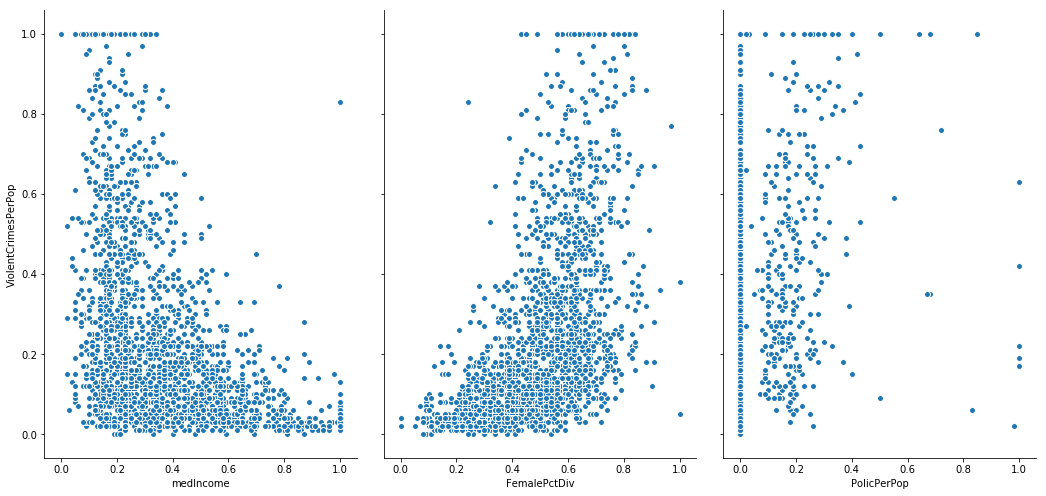

In [6]:
sns.pairplot(df_crime_dataset, 
             x_vars=['medIncome','FemalePctDiv','PolicPerPop'], 
             y_vars='ViolentCrimesPerPop', size=7, aspect=0.7)

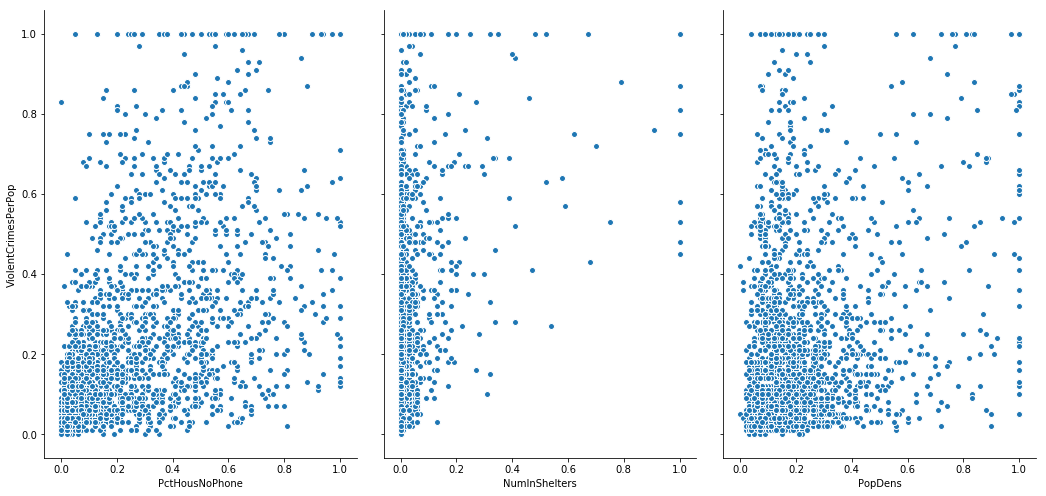

In [7]:
sns.pairplot(df_crime_dataset, 
             x_vars=['PctHousNoPhone','NumInShelters','PopDens'], 
             y_vars='ViolentCrimesPerPop', size=7, aspect=0.7)

In [8]:
# create arrays of features X and labels y (crime rate)
np_feature_set = df_crime_dataset.iloc[:,5:-1].as_matrix()
np_label_set = df_crime_dataset.iloc[:,-1].as_matrix()

In [9]:
# Split data in train set and test set
n_samples = np_feature_set.shape[0]
cutoff_train = int(n_samples * 0.9)
x_train, y_train = np_feature_set[:cutoff_train], np_label_set[:cutoff_train]
x_test, y_test = np_feature_set[cutoff_train:], np_label_set[cutoff_train:]

In [17]:
# training

alpha = 0.0001

def my_trainer(model, x_train, y_train, x_test, y_test):
    y_pred = model.fit(x_train, y_train).predict(x_test)
    r2_score = sklearn.metrics.r2_score(y_test, y_pred)
    print(model)
    print("r^2 on test data : %f \n" % r2_score)

# Lasso
lasso = sklearn.linear_model.Lasso(alpha=alpha)
my_trainer(lasso, x_train, y_train, x_test, y_test)

# ElasticNet
elnet = sklearn.linear_model.ElasticNet(alpha=alpha, l1_ratio=0.7)
my_trainer(elnet, x_train, y_train, x_test, y_test)

#LassoLars
lasso_lars = sklearn.linear_model.LassoLars(alpha=alpha)
my_trainer(lasso_lars, x_train, y_train, x_test, y_test)

#Polynominal Preposessing with ElNet
#poly_prep = sklearn.preprocessing.PolynomialFeatures(degree=3)
#poly_elnet_model = sklearn.pipeline.Pipeline([('poly', poly_prep),
#                  ('elnet', elnet)])
#my_trainer(poly_elnet_model, x_train, y_train, x_test, y_test)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.626746 

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.631559 

LassoLars(alpha=0.0001, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)
r^2 on test data : 0.623220 



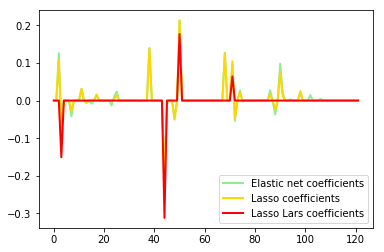

In [14]:
plt.plot(elnet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(lasso_lars.coef_, color='red', linewidth=2,
         label='Lasso Lars coefficients')

plt.legend(loc='best')
plt.show()